# Pseudo experiments to assess data-driven background model

### Apr 12, 2021

## Code

In [2]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
import deDisperse_util as util
import matplotlib.colors as colors

my_path_plots = os.path.abspath("./plots/")

In [3]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")


# Define slope and intercept of fit

Let's assume that we already have the values of $\beta_1$ and $\beta_2$ for the fit of the "differential" distribution of rejected events
$$
e^{\beta_1SNR+\beta_2}
$$

Let's take the values that are in Brian's thesis $\beta_1 = -5.96$, $\beta_2 = 58.29$

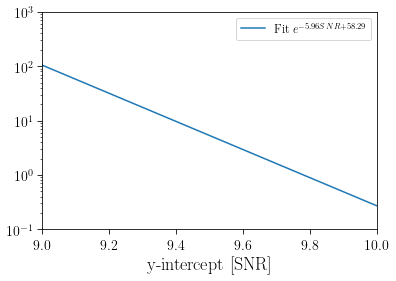

In [38]:
def expFit(beta_1, beta_2, x):#Define fit
    return np.exp(beta_1*x+beta_2)

x = np.linspace(9,10,100)
y = expFit(-5.96, 58.29, x)
plt.plot(x,y, label = "Fit $e^{%0.2f SNR+%0.2f}$"%(-5.96, 58.29))
plt.yscale('log')
plt.xlim(9,10)
plt.xlabel("y-intercept [SNR]")
plt.ylim(0.1,1E3)
plt.legend()
# plt.savefig(my_path_plots+'/NuDirReco/SkyMap_fixedSourceKotera.png', dpi=250)

We know define the binned log-likelihood function
$$
    -2 \ln(\mathcal{L}) = 2\sum^N_{i=1}\left[\mu_i-n_i+n_i\ln\frac{n_i}{\mu_i}\right]
$$

In [44]:
result = scipy.integrate.quad(lambda z: expFit(-5.96, 58.29, z), 9, 10)
result

(17.502544550457962, 1.943172794944599e-13)

In [ ]:
def binnedLogLikelihood(mu, n)
    return 2*np.sum(mu-n+n*np.log(n/mu))

In [106]:
import scipy.stats as st

class my_pdf(st.rv_continuous):
    def _pdf(self,x):
        return 3*x**2 #expFit(-5.96, 58.29, x)  # Normalized over its range, in this case [0,1]

my_cv = my_pdf(a=0, b=10, name='my_pdf')

In [107]:
list = [my_cv.rvs() for i in range(0,10000)]

(array([  35.,  117.,  234.,  413.,  688.,  998., 1228., 1617., 2122.,
        2548.]),
 array([0.06188502, 0.15569386, 0.2495027 , 0.34331154, 0.43712038,
        0.53092922, 0.62473806, 0.7185469 , 0.81235574, 0.90616458,
        0.99997342]),
 <a list of 10 Patch objects>)

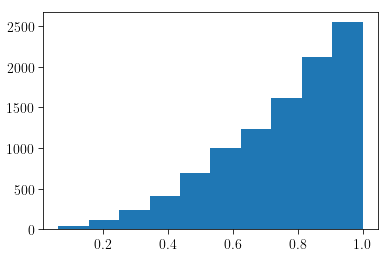

In [108]:
plt.hist(list)
# x = np.linspace(9,10,100)
# y = expFit(-5.96, 58.29, x)
# plt.plot(x,y, label = "Fit $e^{%0.2f SNR+%0.2f}$"%(-5.96, 58.29))
# plt.yscale('log')

In [103]:
my_cv.

SyntaxError: invalid syntax (<ipython-input-103-7c859f4e939f>, line 1)